In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # for 2D visulization
import seaborn as sns # for 2D visulization

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from scipy import stats # for statistics

from nltk.sentiment import SentimentIntensityAnalyzer # sentiment analysis
import nltk
import warnings #filtering our warnings

In [ ]:
d_df = pd.read_csv('/content/demographic.csv')

d_df


,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE
0,2.0,2.0,20.0,18.0,9.0,74.0,NaN,60.0,1.0,6056000.0,1.0,0.0,1979.0,155.0,1.0,2.0,5.0
1,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2.0,19092000.0,0.0,0.0,1969.0,178.0,2.0,1.0,1.0
2,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1.0,1936000.0,2.0,3.0,1964.0,189.0,16.0,4.0,5.0
3,4.0,1.0,46.0,18.0,4.0,NaN,NaN,83.0,2.0,15413000.0,0.0,0.0,NaN,168.0,3.0,2.0,5.0
4,4.0,3.0,NaN,18.0,9.0,NaN,571556.0,74.0,1.0,17533000.0,2.0,NaN,1974.0,172.0,8.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371195,4.0,3.0,75.0,18.0,NaN,75.0,630947.0,82.0,6.0,19262000.0,3.0,0.0,1976.0,156.0,2.0,2.0,NaN
371196,4.0,0.0,94.0,NaN,1.0,NaN,823371.0,99.0,NaN,17533000.0,NaN,4.0,NaN,175.0,NaN,0.0,5.0
371197,NaN,NaN,75.0,18.0,NaN,75.0,631768.0,63.0,3.0,12520000.0,0.0,0.0,1994.0,141.0,3.0,2.0,5.0
371198,4.0,0.0,45.0,18.0,NaN,NaN,NaN,97.0,NaN,17533000.0,3.0,0.0,1981.0,189.0,NaN,2.0,1.0


In [ ]:
d_df_dropped = d_df.dropna()
d_df_dropped

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE
19,4.0,1.0,49.0,18.0,9.0,48.0,571670.0,84.0,2.0,18808000.0,0.0,0.0,1987.0,189.0,8.0,2.0,5.0
39,4.0,1.0,79.0,18.0,6.0,79.0,571297.0,67.0,3.0,19262000.0,0.0,1.0,1986.0,166.0,10.0,2.0,1.0
42,4.0,0.0,79.0,2.0,1.0,79.0,810309.0,86.0,1.0,18288000.0,3.0,1.0,2001.0,170.0,1.0,0.0,5.0
51,4.0,1.0,27.0,18.0,1.0,79.0,570872.0,61.0,6.0,18808000.0,1.0,0.0,1999.0,188.0,1.0,0.0,5.0
78,4.0,0.0,40.0,15.0,1.0,48.0,570156.0,55.0,2.0,17533000.0,5.0,0.0,1981.0,186.0,3.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371050,4.0,0.0,52.0,18.0,6.0,52.0,630766.0,79.0,2.0,19212000.0,2.0,0.0,1984.0,160.0,6.0,2.0,1.0
371055,4.0,2.0,1.0,14.0,7.0,1.0,823324.0,59.0,2.0,18808000.0,5.0,1.0,1988.0,173.0,10.0,2.0,5.0
371060,4.0,1.0,49.0,18.0,9.0,48.0,630830.0,74.0,1.0,12264000.0,4.0,3.0,1986.0,174.0,5.0,1.0,5.0
371118,4.0,2.0,91.0,2.0,6.0,79.0,631513.0,73.0,6.0,19183000.0,3.0,0.0,1974.0,151.0,5.0,2.0,1.0


<ipython-input-6-053a46a823b5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d_df, x=column, palette='viridis')
<ipython-input-6-053a46a823b5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d_df, x=column, palette='viridis')
<ipython-input-6-053a46a823b5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d_df, x=column, palette='viridis')
<ipython-input-6-053a46a823b5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

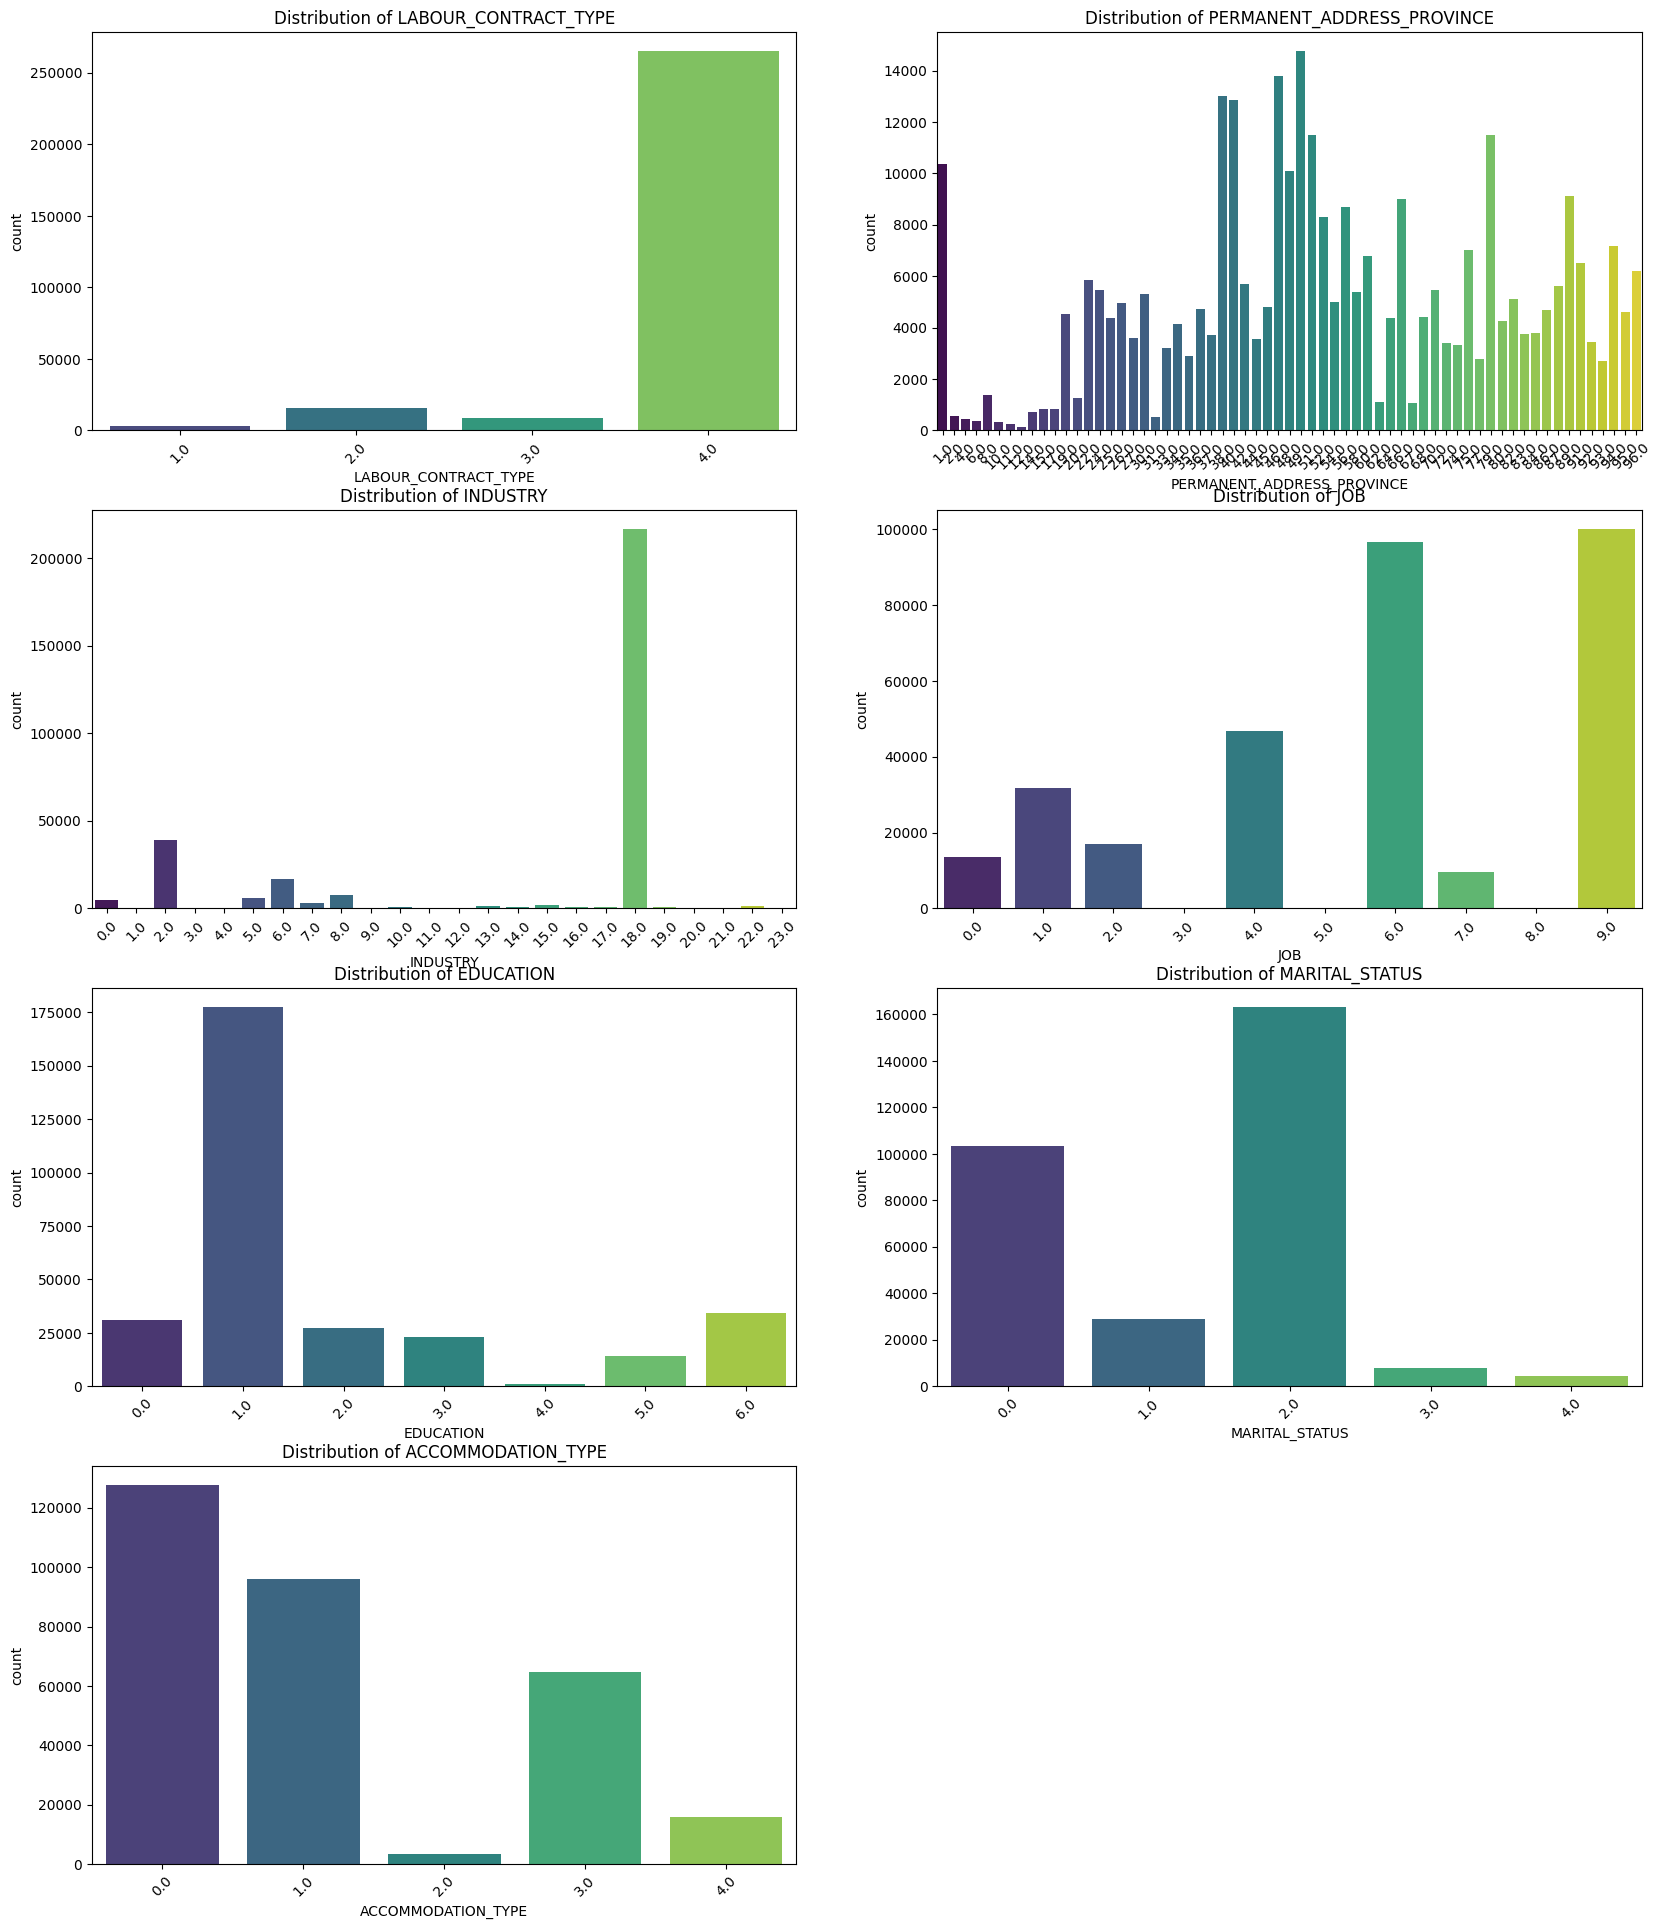

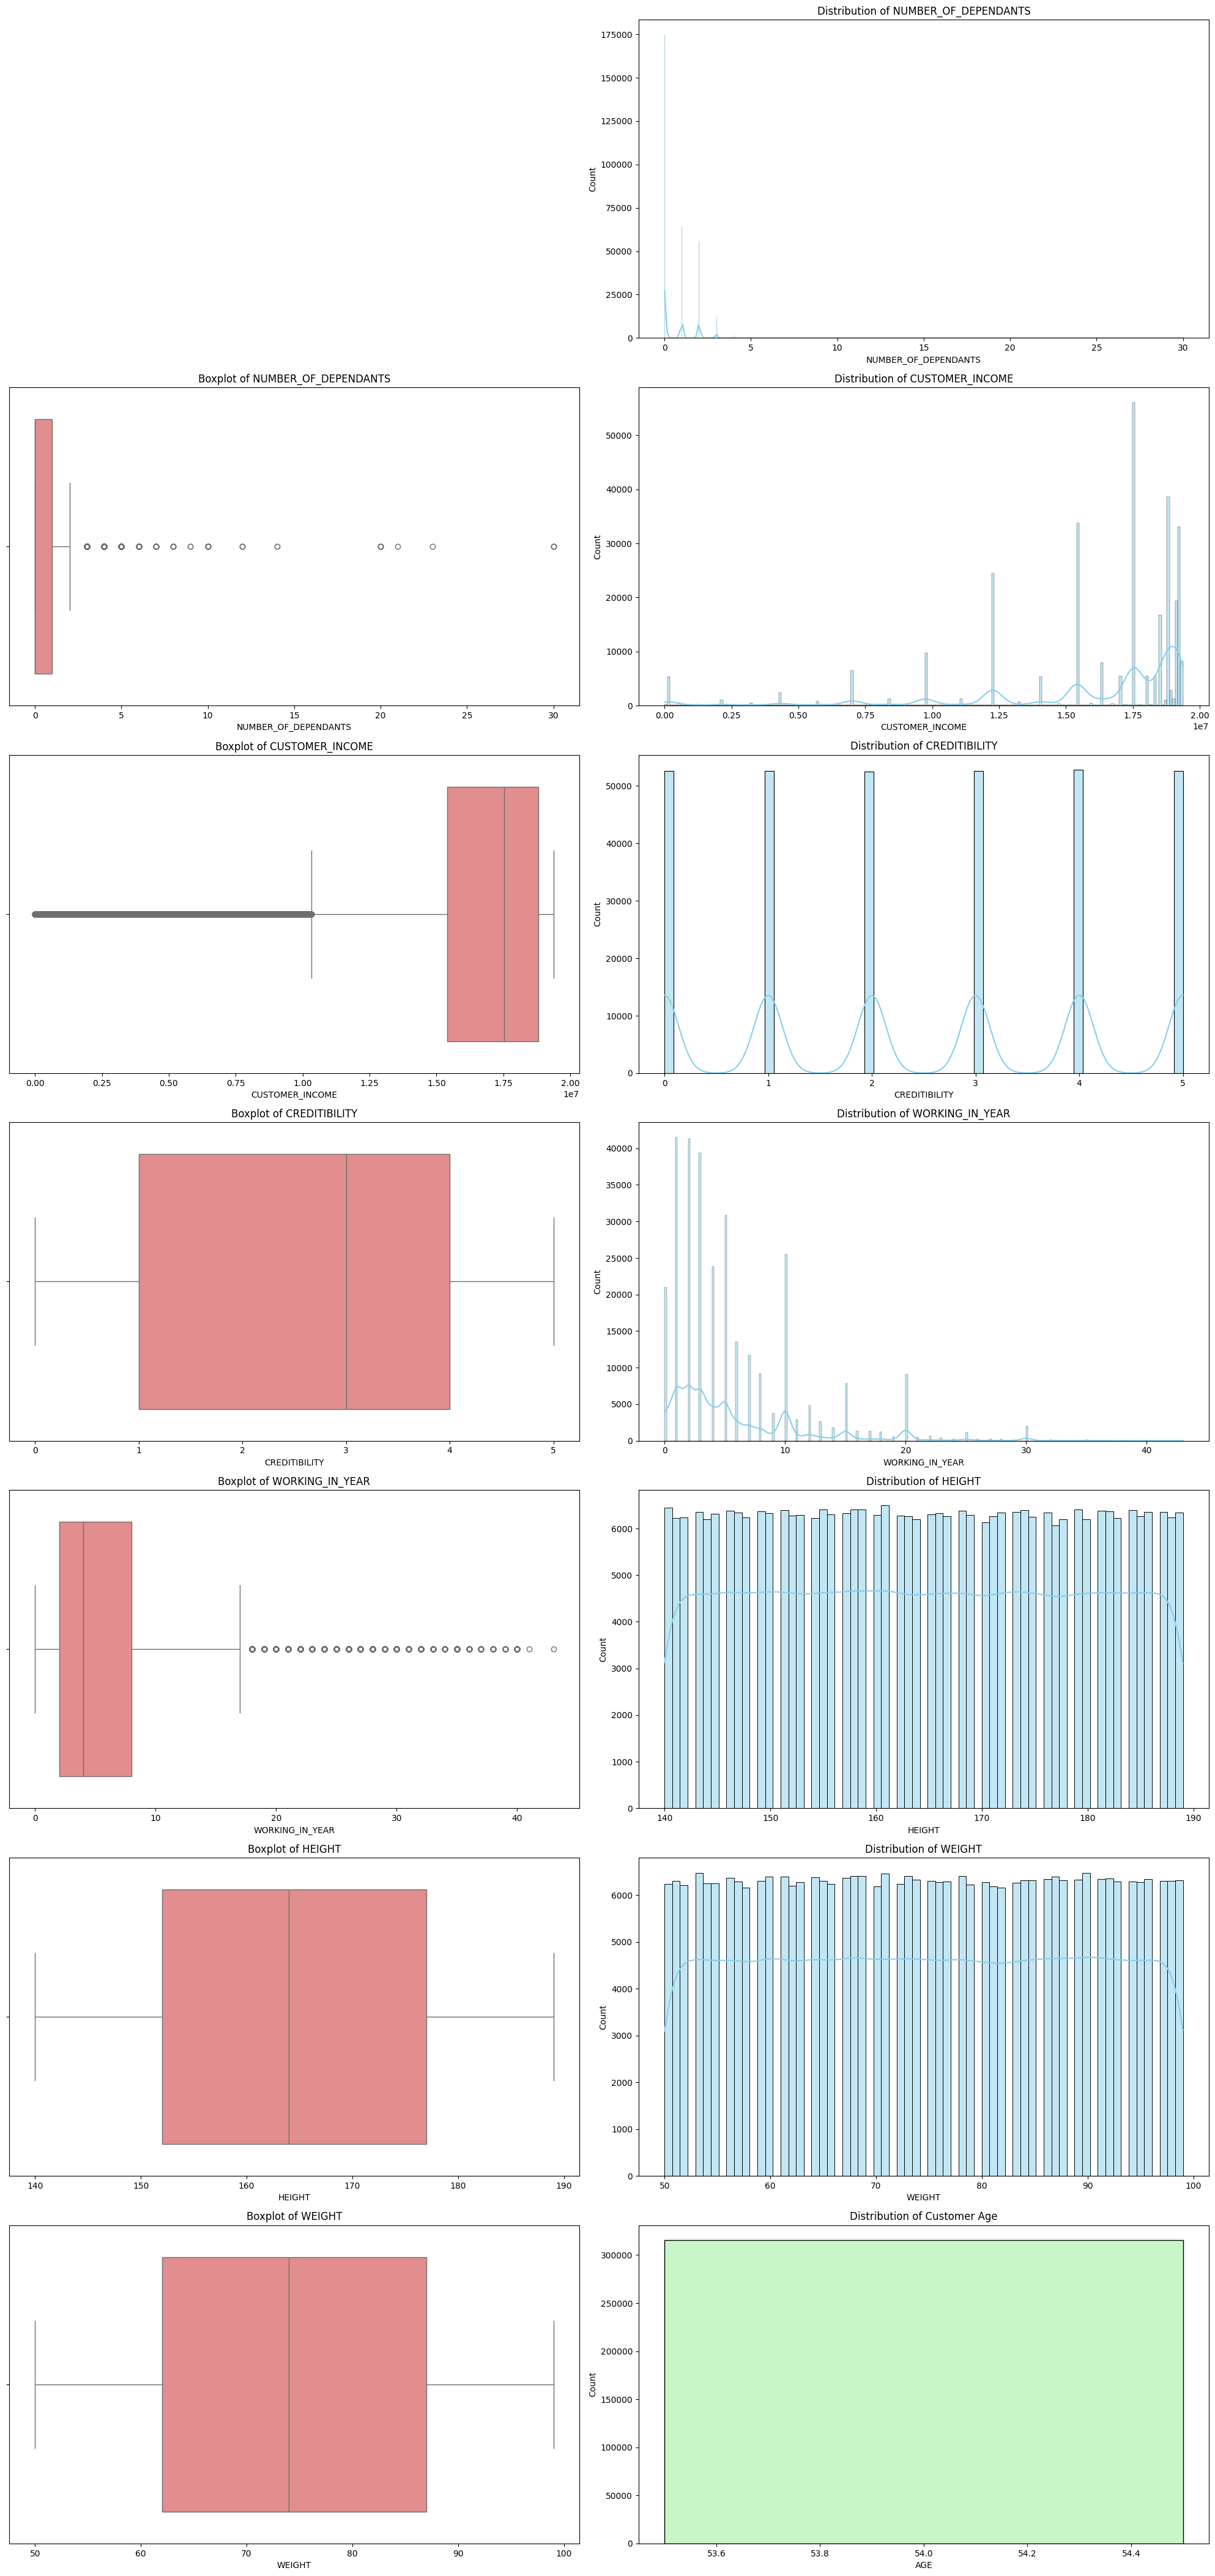

In [ ]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(20, 30))

# 1. Vẽ biểu đồ bar cho các cột phân loại
categorical_columns = [
    'LABOUR_CONTRACT_TYPE', 'PERMANENT_ADDRESS_PROVINCE', 'INDUSTRY',
    'JOB', 'EDUCATION', 'MARITAL_STATUS', 'ACCOMMODATION_TYPE'
]

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=d_df, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# 2. Vẽ biểu đồ phân phối và boxplot cho các cột số
numeric_columns = ['NUMBER_OF_DEPENDANTS', 'CUSTOMER_INCOME', 'CREDITIBILITY',
                   'WORKING_IN_YEAR', 'HEIGHT', 'WEIGHT']

# Adjust subplot grid to accommodate all plots
num_numeric_plots = len(numeric_columns) * 2  # 2 plots (hist & box) per numeric column
total_subplots = len(categorical_columns) + num_numeric_plots + 1 # +1 for age plot
num_rows = (total_subplots + 1) // 2 # Calculate rows, ensuring enough space
# Update figure size to prevent plots being too cramped
plt.figure(figsize=(20, num_rows * 6))


subplot_index = len(categorical_columns) + 1
for column in numeric_columns:
    plt.subplot(num_rows, 2, subplot_index) # num_rows updated
    sns.histplot(d_df[column].dropna(), kde=True, color="skyblue")
    plt.title(f'Distribution of {column}')
    subplot_index += 1

    plt.subplot(num_rows, 2, subplot_index) # num_rows updated
    sns.boxplot(x=d_df[column].dropna(), color="lightcoral")
    plt.title(f'Boxplot of {column}')
    subplot_index += 1

# 3. Tính toán và vẽ biểu đồ phân phối tuổi của khách hàng
from datetime import datetime

# Thêm cột tuổi vào DataFrame
d_df['AGE'] = d_df['DATE_OF_BIRTH'].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)

# Vẽ biểu đồ phân phối tuổi
plt.subplot(num_rows, 2, subplot_index) # num_rows updated
sns.histplot(d_df['AGE'].dropna(), kde=True, color="lightgreen")
plt.title('Distribution of Customer Age')

plt.tight_layout()
plt.show()

<ipython-input-21-cca31ea59416>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d_df_dropped, x=column, palette='viridis')
<ipython-input-21-cca31ea59416>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d_df_dropped, x=column, palette='viridis')
<ipython-input-21-cca31ea59416>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=d_df_dropped, x=column, palette='viridis')
<ipython-input-21-cca31ea59416>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

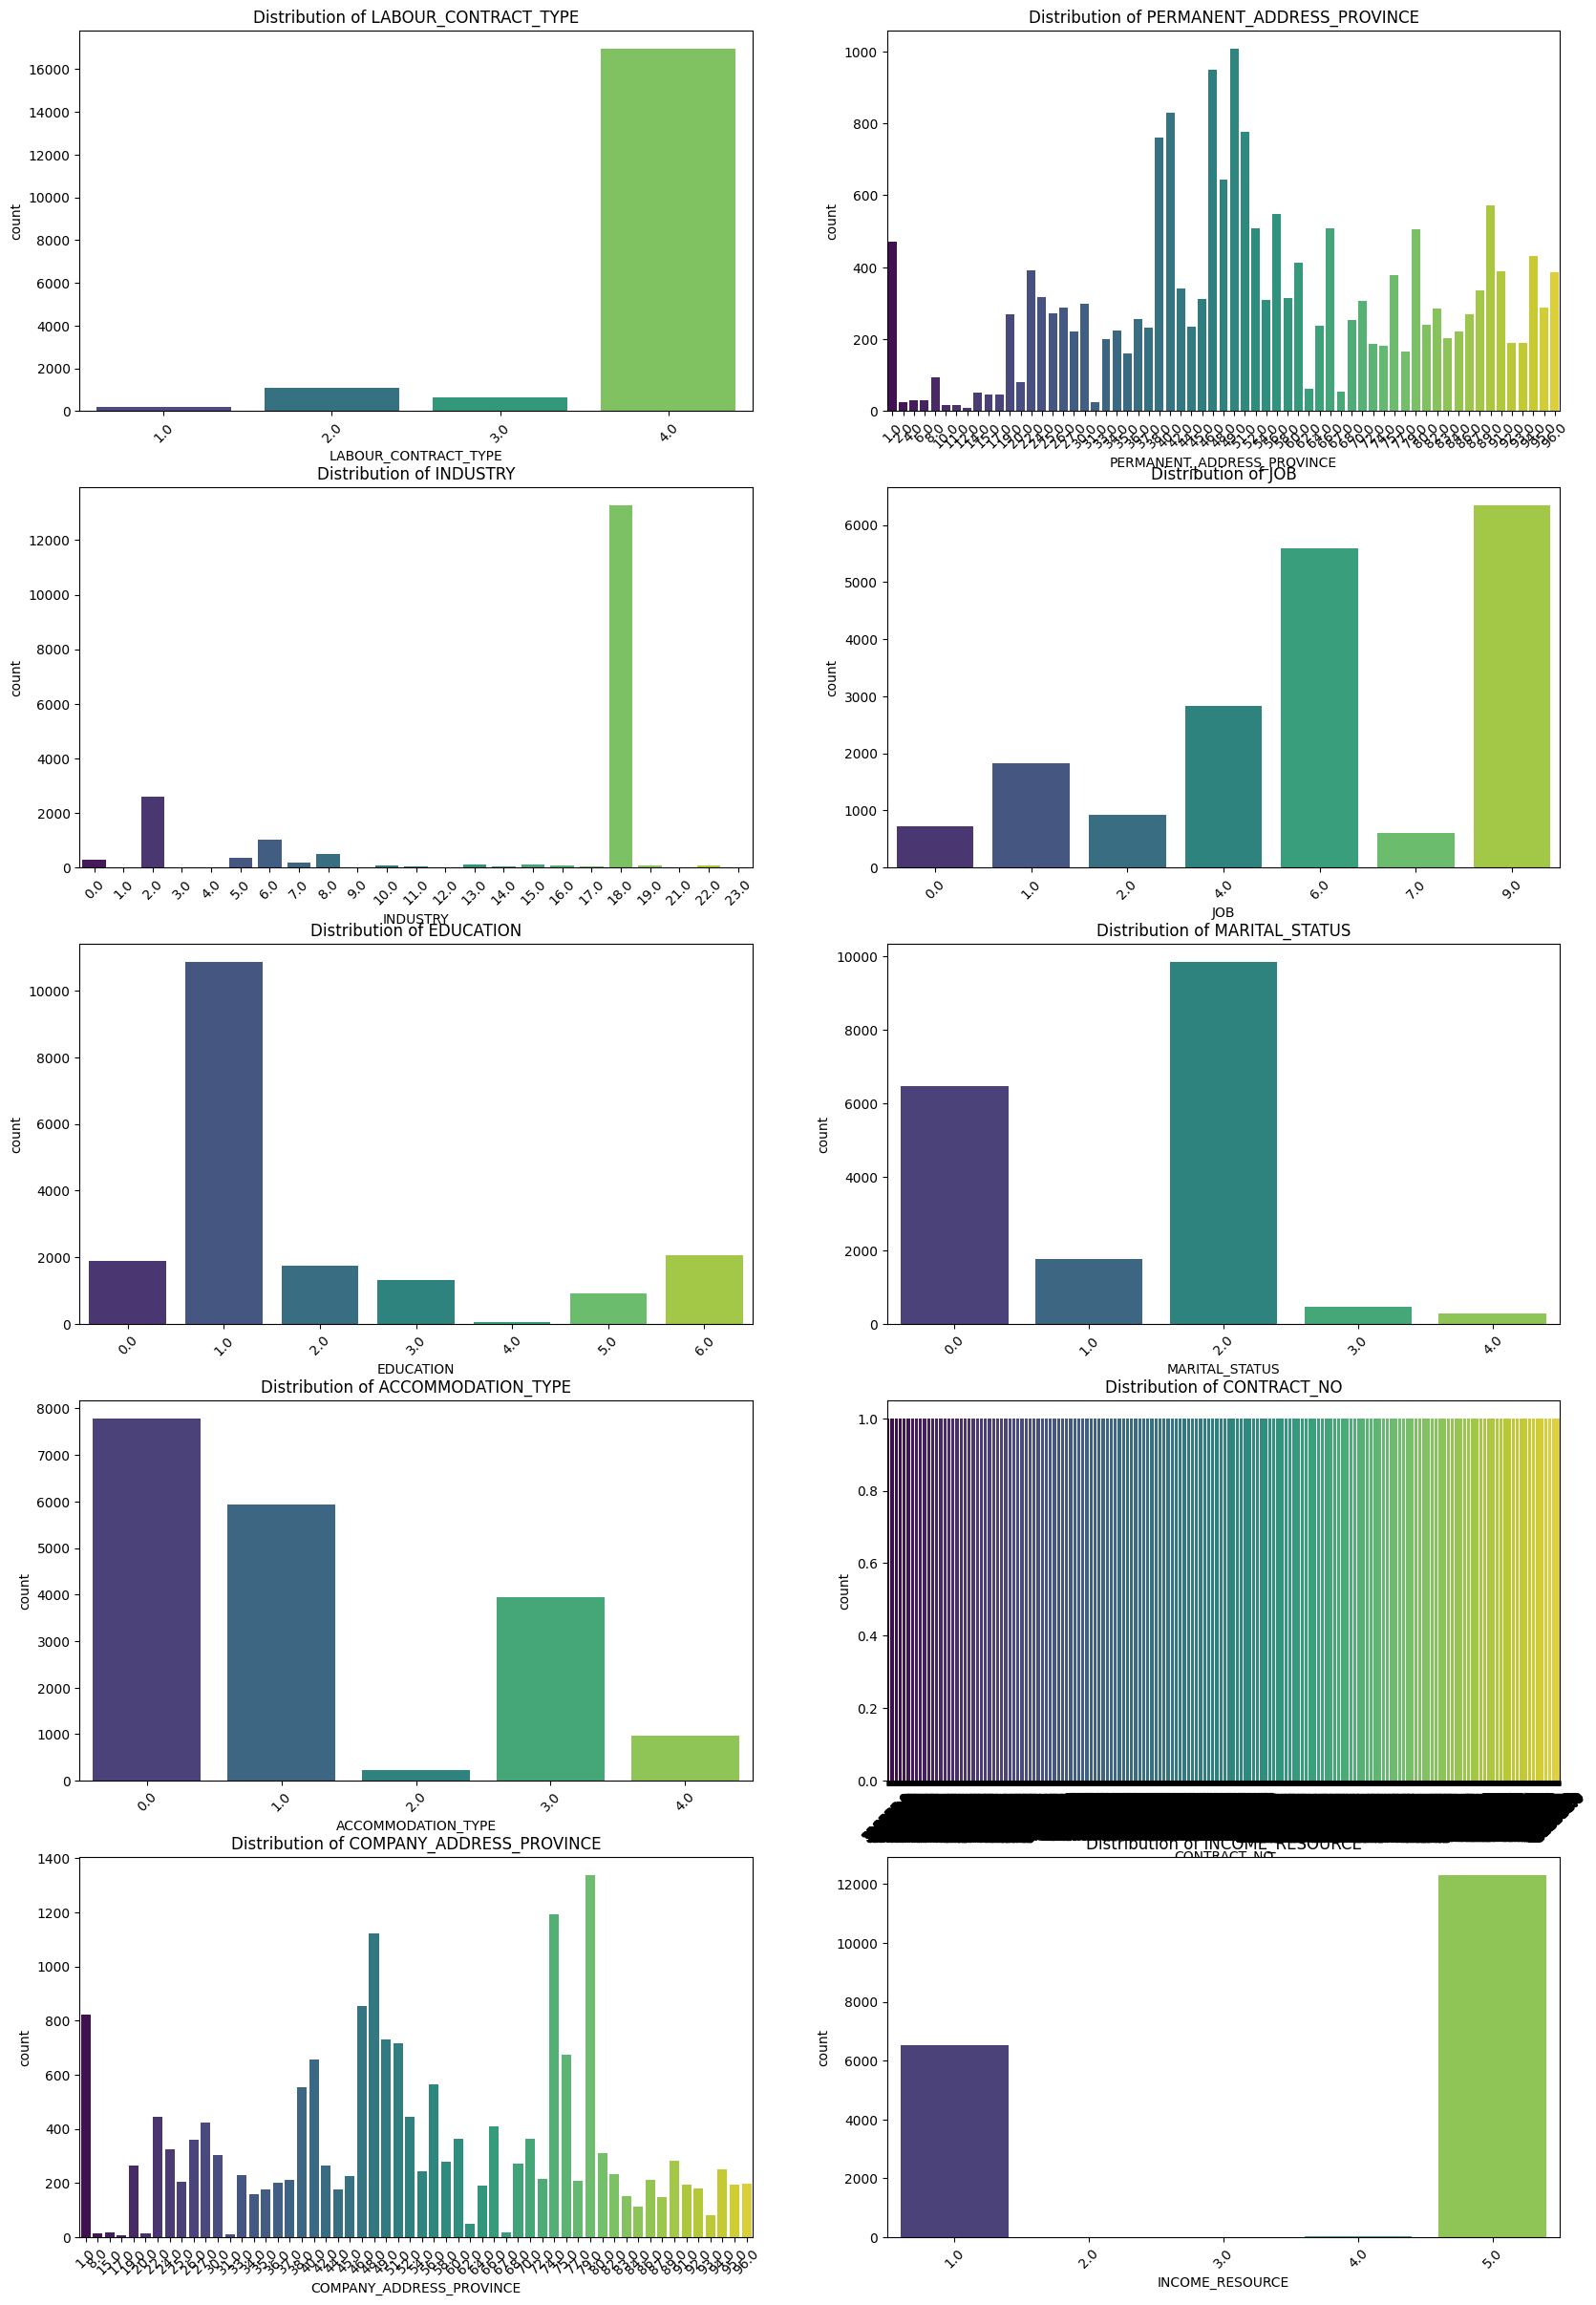

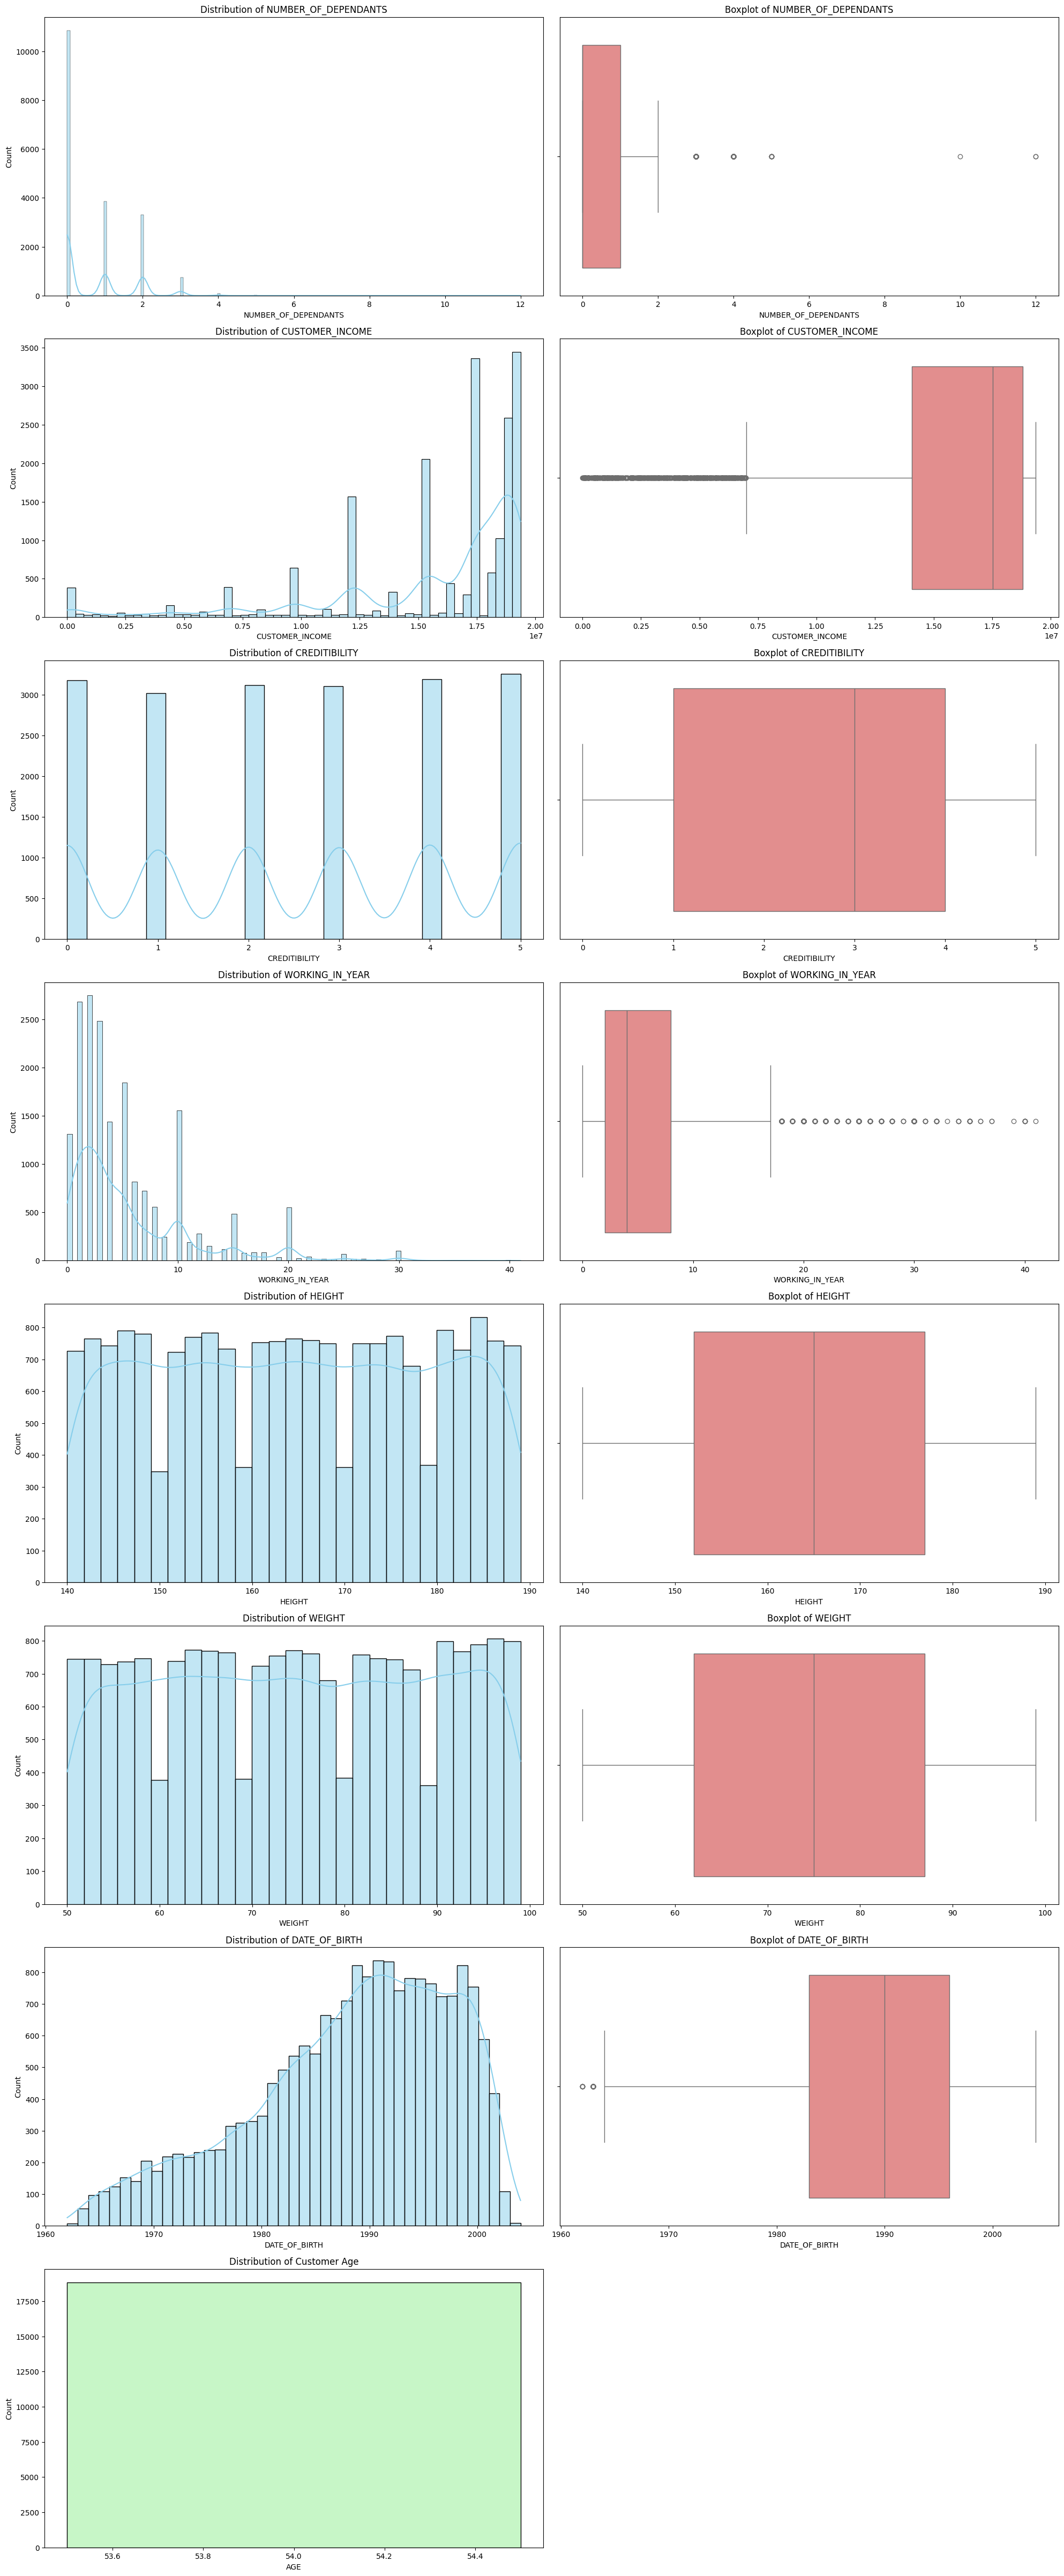

In [ ]:
# Thiết lập kích thước cho biểu đồ
plt.figure(figsize=(20, 30))

# 1. Vẽ biểu đồ bar cho các cột phân loại
categorical_columns = [
    'LABOUR_CONTRACT_TYPE', 'PERMANENT_ADDRESS_PROVINCE', 'INDUSTRY',
    'JOB', 'EDUCATION', 'MARITAL_STATUS', 'ACCOMMODATION_TYPE','CONTRACT_NO','COMPANY_ADDRESS_PROVINCE',
    'INCOME_RESOURCE'
]

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=d_df_dropped, x=column, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# 2. Vẽ biểu đồ phân phối và boxplot cho các cột số
numeric_columns = ['NUMBER_OF_DEPENDANTS', 'CUSTOMER_INCOME', 'CREDITIBILITY',
                   'WORKING_IN_YEAR', 'HEIGHT', 'WEIGHT','DATE_OF_BIRTH']

# Adjust subplot grid to accommodate all plots
num_numeric_plots = len(numeric_columns) * 2  # 2 plots (hist & box) per numeric column
total_subplots = len(categorical_columns) + num_numeric_plots + 1 # +1 for age plot
num_rows = (total_subplots + 1) // 2 # Calculate rows, ensuring enough space
# Update figure size to prevent plots being too cramped
plt.figure(figsize=(20, num_rows * 6))


subplot_index = len(categorical_columns) + 1
for column in numeric_columns:
    plt.subplot(num_rows, 2, subplot_index) # num_rows updated
    sns.histplot(d_df_dropped[column].dropna(), kde=True, color="skyblue")
    plt.title(f'Distribution of {column}')
    subplot_index += 1

    plt.subplot(num_rows, 2, subplot_index) # num_rows updated
    sns.boxplot(x=d_df_dropped[column].dropna(), color="lightcoral")
    plt.title(f'Boxplot of {column}')
    subplot_index += 1

# 3. Tính toán và vẽ biểu đồ phân phối tuổi của khách hàng
from datetime import datetime

# Thêm cột tuổi vào DataFrame
d_df_dropped['AGE'] = d_df_dropped['DATE_OF_BIRTH'].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)

# Vẽ biểu đồ phân phối tuổi
plt.subplot(num_rows, 2, subplot_index) # num_rows updated
sns.histplot(d_df_dropped['AGE'].dropna(), kde=True, color="lightgreen")
plt.title('Distribution of Customer Age')

plt.tight_layout()
plt.show()

In [ ]:
d_df_dropped.describe().round(2)

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE,AGE
count,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.00,18857.0
mean,3.82,0.70,54.91,14.16,5.83,54.59,489464.84,74.72,1.88,15631249.88,2.52,1.17,1988.34,164.54,5.57,1.28,3.62,54.0
std,0.57,0.94,24.04,6.41,2.87,23.40,105170.58,14.50,1.80,4541054.56,1.72,1.30,9.35,14.45,5.62,1.01,1.90,0.0
min,1.00,0.00,1.00,0.00,0.00,1.00,320376.00,50.00,0.00,8000.00,0.00,0.00,1962.00,140.00,0.00,0.00,1.00,54.0
25%,4.00,0.00,38.00,8.00,4.00,38.00,402194.00,62.00,1.00,14082000.00,1.00,0.00,1983.00,152.00,2.00,0.00,1.00,54.0
50%,4.00,0.00,51.00,18.00,6.00,51.00,484594.00,75.00,1.00,17533000.00,3.00,1.00,1990.00,165.00,4.00,2.00,5.00,54.0
75%,4.00,1.00,75.00,18.00,9.00,75.00,565123.00,87.00,2.00,18808000.00,4.00,3.00,1996.00,177.00,8.00,2.00,5.00,54.0
max,4.00,12.00,96.00,23.00,9.00,96.00,848494.00,99.00,6.00,19366000.00,5.00,4.00,2004.00,189.00,41.00,4.00,5.00,54.0


In [ ]:
d_df.describe().round(2)

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE,AGE
count,293048.00,307877.00,315371.00,304094.00,315548.00,262358.00,315507.00,315684.00,308236.00,315351.00,315533.00,307761.00,315328.00,315411.00,301330.00,307785.00,308138.00,315328.0
mean,3.83,0.71,55.04,14.27,5.71,54.67,543395.17,74.52,1.89,15801935.54,2.50,1.17,1988.13,164.48,5.68,1.29,3.52,54.0
std,0.56,0.95,24.54,6.34,2.88,23.47,151571.49,14.43,1.80,4444601.41,1.71,1.31,9.32,14.43,5.69,1.01,1.93,0.0
min,1.00,0.00,1.00,0.00,0.00,1.00,314130.00,50.00,0.00,1000.00,0.00,0.00,1962.00,140.00,0.00,0.00,0.00,54.0
25%,4.00,0.00,38.00,8.00,4.00,38.00,420477.50,62.00,1.00,15413000.00,1.00,0.00,1982.00,152.00,2.00,0.00,1.00,54.0
50%,4.00,0.00,51.00,18.00,6.00,51.00,517575.00,74.00,1.00,17533000.00,3.00,1.00,1990.00,164.00,4.00,2.00,5.00,54.0
75%,4.00,1.00,77.00,18.00,9.00,75.00,614846.50,87.00,2.00,18808000.00,4.00,3.00,1996.00,177.00,8.00,2.00,5.00,54.0
max,4.00,30.00,96.00,23.00,9.00,96.00,862727.00,99.00,6.00,19371000.00,5.00,4.00,2004.00,189.00,43.00,4.00,5.00,54.0


In [ ]:
for column in d_df.columns:
    print(f" {column}:")
    print(d_df[column].unique())

 LABOUR_CONTRACT_TYPE:
[ 2.  4. nan  1.  3.]
 NUMBER_OF_DEPENDANTS:
[ 2.  0.  1.  3. nan  4.  5.  6.  8. 20. 10.  7.  9. 14. 23. 30. 12. 21.]
 PERMANENT_ADDRESS_PROVINCE:
[20. 58. nan 46. 96. 48. 89. 79.  1. 42. 70. 51. 38. 56. 49. 74. 68. 84.
 45. 94. 40. 82. 77. 60. 52.  8. 37. 19. 64. 27. 86. 35. 34. 24. 44. 62.
 75. 83. 26. 92. 30. 80. 72. 25. 66. 36. 54. 22. 87. 91. 93. 95. 67. 17.
 33. 31. 11.  4.  2.  6. 12. 15. 14. 10.]
 INDUSTRY:
[18.  2. nan  0.  7.  6. 13.  5.  8. 14. 15. 22. 10. 19. 21. 16. 11. 17.
  9.  3.  1. 23.  4. 12. 20.]
 JOB:
[ 9. nan  4.  0.  1.  6.  2.  7.  8.  5.  3.]
 COMPANY_ADDRESS_PROVINCE:
[74. 58. nan 75. 48. 79.  1. 51. 38. 96. 70. 68. 45. 94. 77. 60. 40. 49.
 89. 37. 19. 64. 86. 56. 34. 42. 52. 26. 27. 46. 83. 92. 30. 72. 82. 84.
 44. 54. 22. 93.  8. 80. 35. 66. 33. 87. 95. 36. 24. 25. 91. 67. 62. 31.
  6. 15. 17. 20. 10. 14.  2. 11.  4.]
 CONTRACT_NO:
[    nan 569518. 569723. ... 823371. 631768. 631333.]
 WEIGHT:
[60. nan 65. 83. 74. 85. 69. 53. 78. 67. 

In [ ]:
d_df_dropped

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE,AGE
19,4.0,1.0,49.0,18.0,9.0,48.0,571670.0,84.0,2.0,18808000.0,0.0,0.0,1987.0,189.0,8.0,2.0,5.0,54
39,4.0,1.0,79.0,18.0,6.0,79.0,571297.0,67.0,3.0,19262000.0,0.0,1.0,1986.0,166.0,10.0,2.0,1.0,54
42,4.0,0.0,79.0,2.0,1.0,79.0,810309.0,86.0,1.0,18288000.0,3.0,1.0,2001.0,170.0,1.0,0.0,5.0,54
51,4.0,1.0,27.0,18.0,1.0,79.0,570872.0,61.0,6.0,18808000.0,1.0,0.0,1999.0,188.0,1.0,0.0,5.0,54
78,4.0,0.0,40.0,15.0,1.0,48.0,570156.0,55.0,2.0,17533000.0,5.0,0.0,1981.0,186.0,3.0,1.0,5.0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371050,4.0,0.0,52.0,18.0,6.0,52.0,630766.0,79.0,2.0,19212000.0,2.0,0.0,1984.0,160.0,6.0,2.0,1.0,54
371055,4.0,2.0,1.0,14.0,7.0,1.0,823324.0,59.0,2.0,18808000.0,5.0,1.0,1988.0,173.0,10.0,2.0,5.0,54
371060,4.0,1.0,49.0,18.0,9.0,48.0,630830.0,74.0,1.0,12264000.0,4.0,3.0,1986.0,174.0,5.0,1.0,5.0,54
371118,4.0,2.0,91.0,2.0,6.0,79.0,631513.0,73.0,6.0,19183000.0,3.0,0.0,1974.0,151.0,5.0,2.0,1.0,54
